# __Data visualisation__

Visualising any new dataset you work with can be of tremendous help. It gives you an idea about traits of your dataset and guides you towards necessary data analysis steps. Moreover, it facilitates the identification of useful predictors for your model training and predicion.

In [56]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.simplefilter('ignore') #ignores useless warnings and will not output them

import pylab
pylab.rcParams['figure.figsize'] = (7, 4) #fixes the figure size

In [47]:
df = pd.read_pickle('../data/train_clean.pkl')
df.head()

,t CO2-e / MWh
2009-07-01 04:00:00,0.991217
2009-07-01 04:05:00,0.000000
2009-07-01 04:10:00,0.000000
2009-07-01 04:15:00,0.991217
2009-07-01 04:20:00,1.025701


In [48]:
df.shape

(937968, 1)

In [49]:
df.isnull().any()

t CO2-e / MWh    False
dtype: bool

### __Plotting each 5 min interval within 48 h__

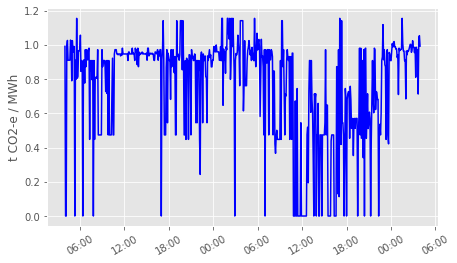

In [12]:
#due to the massive size of the dataset, we only plot out a 48 h section of it

plt.style.use('ggplot') #this onlybecomes necessary if you use the jupyter dark theme

fig = sns.lineplot(df.index[:576], df['t CO2-e / MWh'].iloc[:576], color='blue')
fig.set_ylabel("t CO2-e / MWh")


date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

for i in fig.get_xticklabels():
    i.set_rotation(30)

sns.set_style("whitegrid")

#pip install --upgrade numpy pandas matplotlib seaborn jupyterlab

### __Plotting grouped time intervals over while dataset__

In [15]:
#in order to decrease the size of our dataset for its plotting, we use the .resample() method with option "M", averaging our data for each month

df_resample = df.resample("M").mean() 
#check out 'DateOffset objects here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects'

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [16]:
df_resample.head()

,t CO2-e / MWh
2009-07-31,0.712658
2009-08-31,0.746656
2009-09-30,0.713189
2009-10-31,0.640791
2009-11-30,0.636747


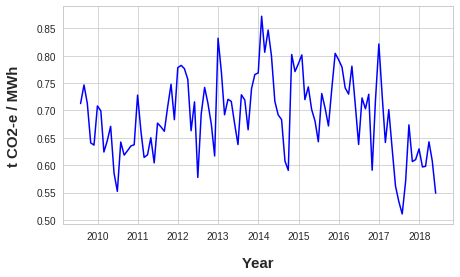

In [17]:
#let's plot out our resampled data
fig = plt.plot_date(df_resample.index, df_resample['t CO2-e / MWh'], linestyle='solid', marker=None, color='blue')

plt.xlabel("Year", labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')

sns.set_style('whitegrid')
plt.style.use('seaborn')

### __Anything more than randomness? -> decompose__

From the above plots it is difficult to find any clear patterns. Let's explore what other methods we can use and what other analyses can be performed to get a clearer picture of our data.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

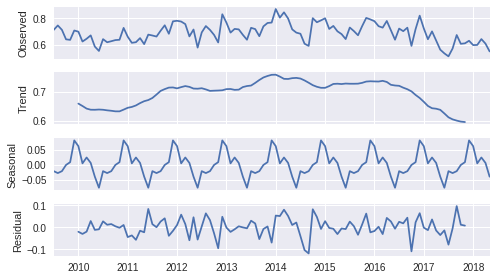

In [51]:
df_decomposed = seasonal_decompose(df_resample['t CO2-e / MWh'], model='additive') #sketch on whiteboard
pylab.rcParams['figure.figsize'] = (7, 4)
df_decomposed.plot();

### __Anything more than randomness? -> check for random walk behaviour__

Any time series with a random walk behaviour is - as the name suggests - a random dataset whose association to a timestamp dow not provide any useful insights. In oder for it to be useful to examine our dataframe for time features, we should be able to exclude the possibility for our dataset to be a random walk.

A random walk is a time series, of which an obeserved value $y_t$ simply depends on its previous value $y_{t-1}$ and an error $\epsilon_t$, rendering the relation betweem timestap and target value random.

__Random walk:__
<br/>
$y_t=y_{t-1}+\epsilon_t$
<br/>
<br/>

In [52]:
import numpy as np

from random import seed
from random import random
from matplotlib import pyplot

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

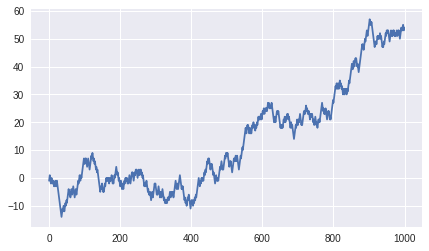

In [53]:
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

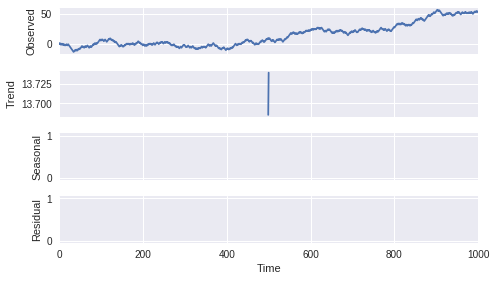

In [22]:
test = seasonal_decompose(random_walk, freq=998)
pylab.rcParams['figure.figsize'] = (7, 4)
test.plot();

__Compare this with the seasonal decomposition of our dataset.__

#### __Autocorrelation plots of random walks__

Other than by checking our dataset for its seasonal decomposition, we can compare the autocorrelations functions of our dataset and the one of a random walk, as the latter comes with a very specific trajectory.

But first, let's dive into what autocorrelation functions are.

#### __Autocorrelation:__

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

The images below show how autocorrelation (acf) works on the example of days. Some quantity (e.g. temperature) of day i ($y_t$) gets compared to the same quantity one day before at day i-1 ($y_{t-1}$). The resulting correlation is evaluated using Pearson's r. An acf plot plots the different R values over the considered time lags.

In [40]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='../images/acf_1.jpg' width='400'></td><td><img src='../images/acf_2.jpg'width='400'></td></tr></table>"))

,


source: Brandon Rohrer on youtube

### __Random walk acf__

In [54]:
#let's import packages for an easy plotting of our acfs and pacfs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

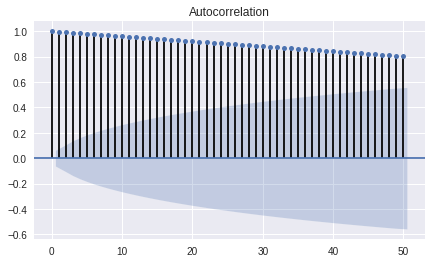

In [55]:
#random walk acf feature a slow and linear decrease of the acf components with increasing lags
plot_acf(random_walk, lags=50);

As described above, the ordinate reflects the respective R values which stem from the comparison of $y_t$ and $y_{t-1}$, $y_{t-2}$, ..., $y_{t - lags}$, while the lags are shown on the abscissa.

__It is characteristic for a random walk acf to decay slowly in a linear fashion.__

### __Autocorrelation of our dataset__

We are working with a pretty massive dataset of which the calculation of the acf becomes pretty time-consuming. Therefore, we will only examine a section of our dataset. Since we have a great amount of data, this will still give us a good idea about our data.

In [57]:
df_acf = df[df.index > dt.datetime(2016,1,1,0,0,0)]
print(df.index.min())
df_acf.index.max()

2009-07-01 04:00:00


Timestamp('2018-05-31 23:55:00')

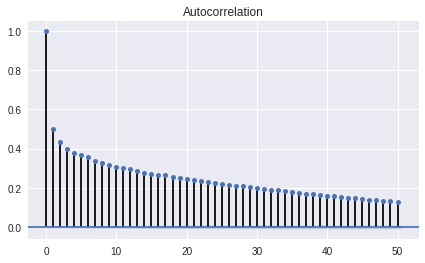

In [58]:
plot_acf(df_acf, lags=50);

__Our dataset features an exponential decay and therefore clearly differs from a random walk. Much mire could be read from it, but for now that is all we care about.__

### __Anything more than randomness? -> Autocorrelation of differenced data__

A dataset can be processed by always subtracting a value $y_t$ from its preceding value $y_{t-1}$. That action is called _differencing_.

#### __Acf of a differenced random walk__

In case of a random walk, differenced data reflect nothing but the stochastic error:
<br/>
<br/>
$y_t - y_{t-1} = \epsilon_t$

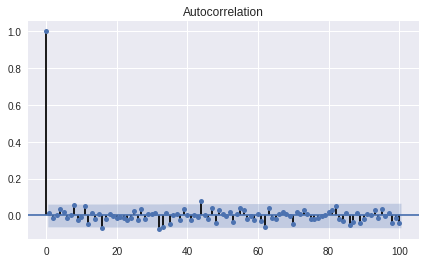

In [59]:
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
    
plot_acf(diff, lags=100);

### __Acf of our dataset__

Let's difference the CO2 column of our dataset. In pandas, this can be done with the .shift() method.

In [60]:
df_acf['differenced'] = df_acf["t CO2-e / MWh"] - df_acf["t CO2-e / MWh"].shift(1)
df_acf.head(7)

,t CO2-e / MWh,differenced
2016-01-01 00:05:00,0.681150,NaN
2016-01-01 00:10:00,0.681150,0.000000
2016-01-01 00:15:00,0.000000,-0.681150
2016-01-01 00:20:00,0.000000,0.000000
2016-01-01 00:25:00,0.000000,0.000000
2016-01-01 00:30:00,0.910143,0.910143
2016-01-01 00:35:00,0.681150,-0.228993


In [19]:
#obviously, differencing causes one NaN value in our dataset
df_acf[df_acf.differenced.isna()]

,t CO2-e / MWh,differenced
2016-01-01 00:05:00,0.68115,NaN


In [20]:
#we need to delete the NaN value in order to plot our acf
df_acf.dropna(inplace=True)
df_acf[df_acf.differenced.isna()]

,t CO2-e / MWh,differenced


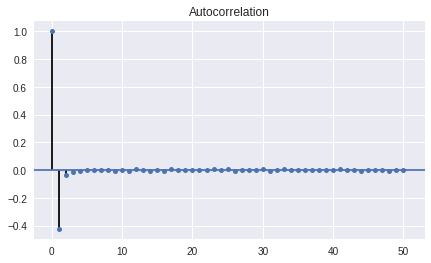

In [21]:
plot_acf(df_acf.differenced, lags=50);

__Also here, the acf of our dataset looks different from the one of the random walk. Further interpretations are not of any concern here.__

### __Excursion: Partial autocorrelation__

Although we do not have a direct application for it right here, for the sake of completeness the partial autocorrelation (pacf) is introduced.
Here, the error, i.e. deviation of a quantity from a linear line of day i ($y_{t-1}$) gets compared to the same quantity (not its error!) one day before at day i-2 ($y_{t-2}$). The resulting correlation is evaluated using Pearson's r. An pacf plot plots the different R values over the considered time lags.

In [67]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='../images/pacf_1.png' width='600'></td><td><img src='../images/pacf_2.png'width='600'></td></tr></table>"))

,


source: Brandon Rohrer on youtube

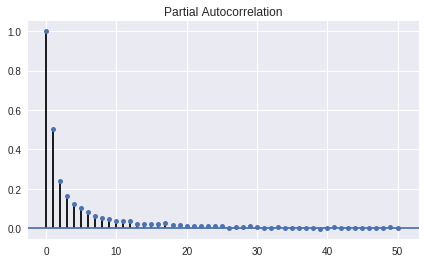

In [63]:
#let's plot the acf of our own dataset
plot_pacf(df_acf['t CO2-e / MWh'], lags=50);

__Compare the appearance of this plot with the acf. What is different?__

## __Selection of relevant time features for training__

One common way to identify relevant time features for predictions is to plot our target averaged over different time periods. We do this with the .groupby() method making use of our DateTimeIndex.

Note: this is a common way to identify time features, but it is not exhaustive. Metrics exist to check for that quantitatively. We will see one of them later today.

In [69]:
group_year = df.groupby(df.index.year).mean()
group_quarter = df.groupby(df.index.quarter).mean()
group_month = df.groupby(df.index.month).mean()
group_week = df.groupby(df.index.week).mean()
group_weekday = df.groupby(df.index.weekday).mean()
group_day = df.groupby(df.index.day).mean()
group_hour = df.groupby(df.index.hour).mean()
group_minute = df.groupby(df.index.minute).mean()

#quarter: Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.

In [70]:
time_periods = {"year":group_year,"quarter":group_quarter, "month":group_month, "week":group_week,\
                "weekday":group_weekday,"day":group_day, "hour":group_hour, "minute":group_minute}

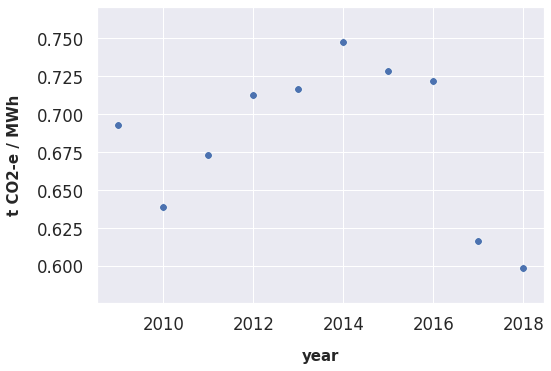

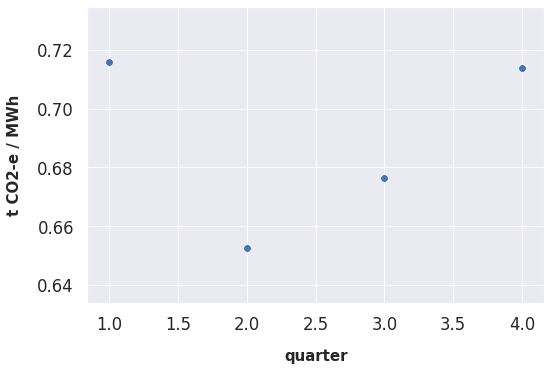

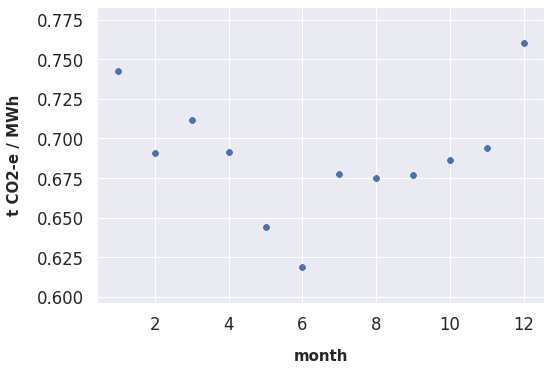

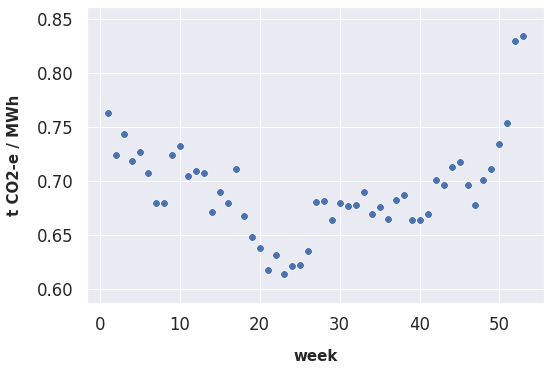

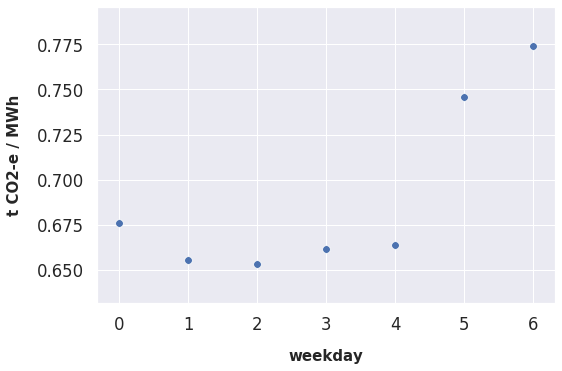

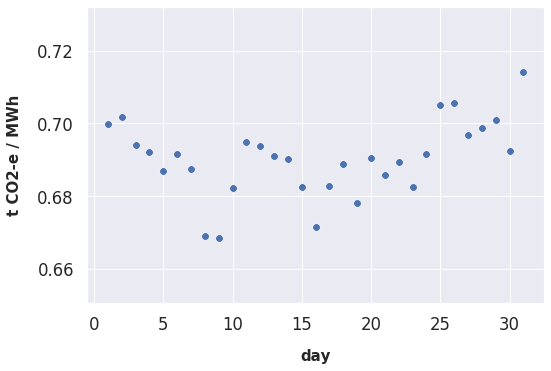

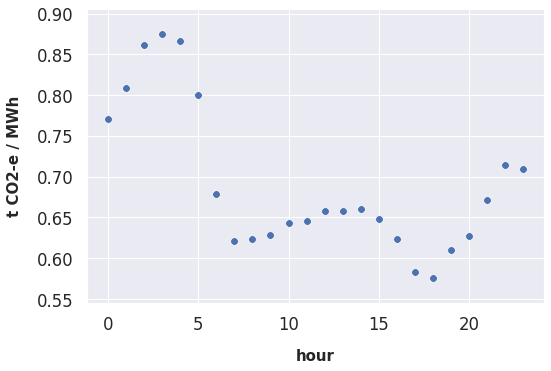

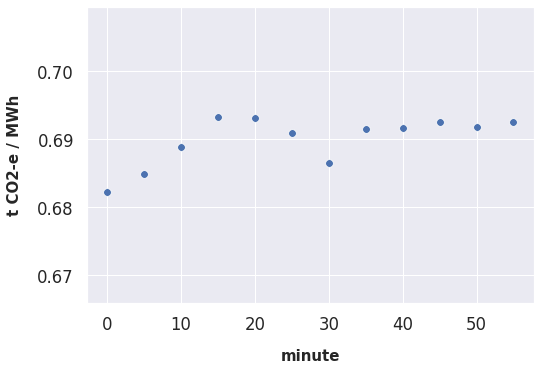

<Figure size 576x396 with 0 Axes>

In [72]:
for i in time_periods:
    fig = sns.scatterplot(time_periods[i].index, time_periods[i]['t CO2-e / MWh'], s=60)
    
    fig.set_xlabel(i, labelpad=15, fontsize=15, fontweight='bold')
    fig.set_ylabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')
    
    plt.style.use('seaborn')
    sns.set(font_scale=1.5)
    plt.tight_layout()
    
    plt.figure()